# Execute the Graph-Based Spatial Cross-Validation experiments from ICMLA21 Paper

## 1 - Initialize libraries

In [1]:
import os
import pandas as pd
from src import utils
from src.visualization.performance import VizMetrics
from src.visualization.dependence import VizDependence

H:\anaconda3\envs\graph_based_scv\lib\site-packages\spaghetti\network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


## 2 - Initialize loggers

In [2]:
utils.initialize_coloredlog()
utils.initialize_rich_tracerback()
utils.initialize_logging()

## 3 - Initialize working path and enviromental variables

In [3]:
# Project path
project_dir = os.path.abspath('')[:-5]
# Load enviromental variables
env_var = utils.load_env_variables(project_dir)

## 4 - Load the data

In [4]:
dataset = "Brazil_Election_2018_Sampled_dec0.3_prob0.6"
#dataset = "US_Wheat_Yield_2014"
# Set paths
adj_path = os.path.join(env_var["root_path"], dataset, "normd_matrix.csv")

# Load data
adj_matrix = pd.read_csv(adj_path, low_memory=False)
# Set adjacency matrix index
adj_matrix.set_index(adj_matrix.columns[0], inplace=True)
adj_matrix = 1 - adj_matrix 

## 7 - Generate plots
OBS: The plots generate will be in the created folder comparison in the data directory 

### 7.1 Generate performance plots

2022-01-21 16:46:50 DESKTOP-117CMAH root[30580] INFO Generating mean table.


Generating performance plots...


Generating plots: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]


                      TraditionalSCV  RegGBSCV_R_Kappa_0.0  \
TraditionalSCV              1.000000              0.325426   
RegGBSCV_R_Kappa_0.0        0.325426              1.000000   
RegGBSCV_R_Kappa_0.2        0.415620              0.900000   
RegGBSCV_R_Kappa_0.4        0.392709              0.900000   
RegGBSCV_R_Kappa_0.6        0.439919              0.900000   
RegGBSCV_R_Kappa_0.8        0.633236              0.900000   
RegGBSCV_R_Kappa_1.0        0.706433              0.900000   
Optimistic                  0.158563              0.900000   

                      RegGBSCV_R_Kappa_0.2  RegGBSCV_R_Kappa_0.4  \
TraditionalSCV                     0.41562              0.392709   
RegGBSCV_R_Kappa_0.0               0.90000              0.900000   
RegGBSCV_R_Kappa_0.2               1.00000              0.900000   
RegGBSCV_R_Kappa_0.4               0.90000              1.000000   
RegGBSCV_R_Kappa_0.6               0.90000              0.900000   
RegGBSCV_R_Kappa_0.8             

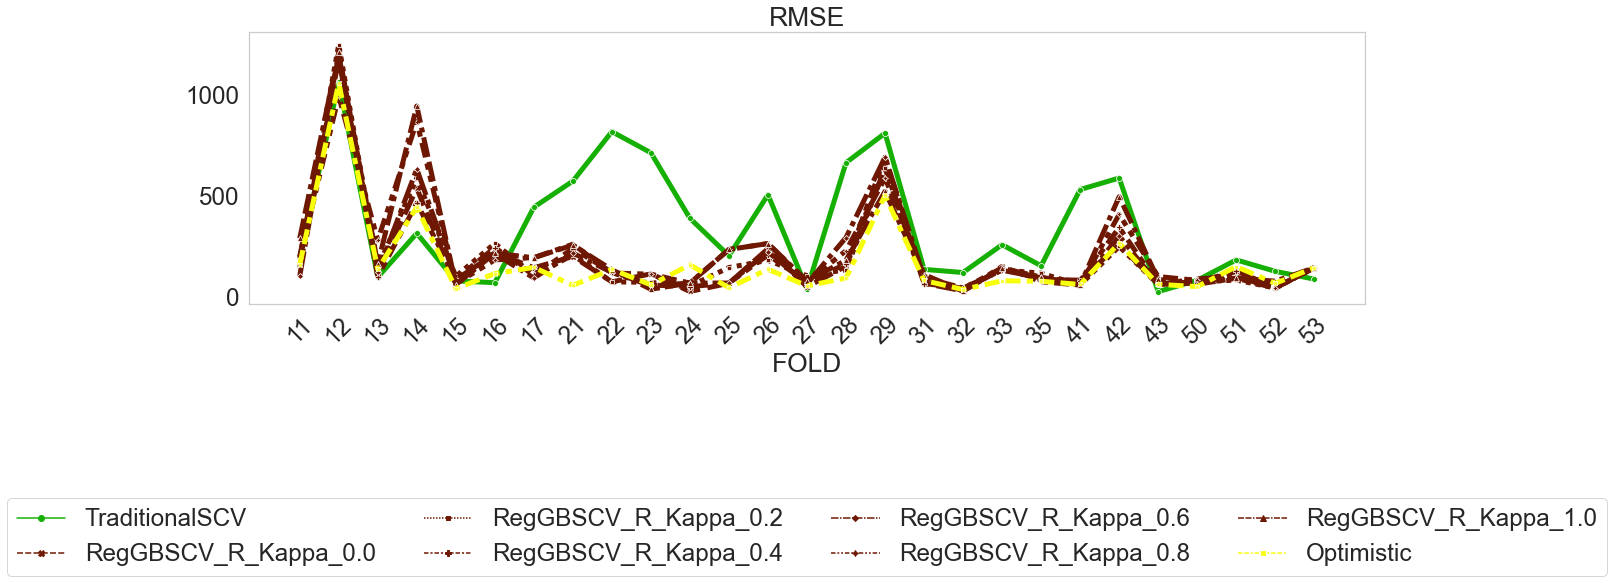

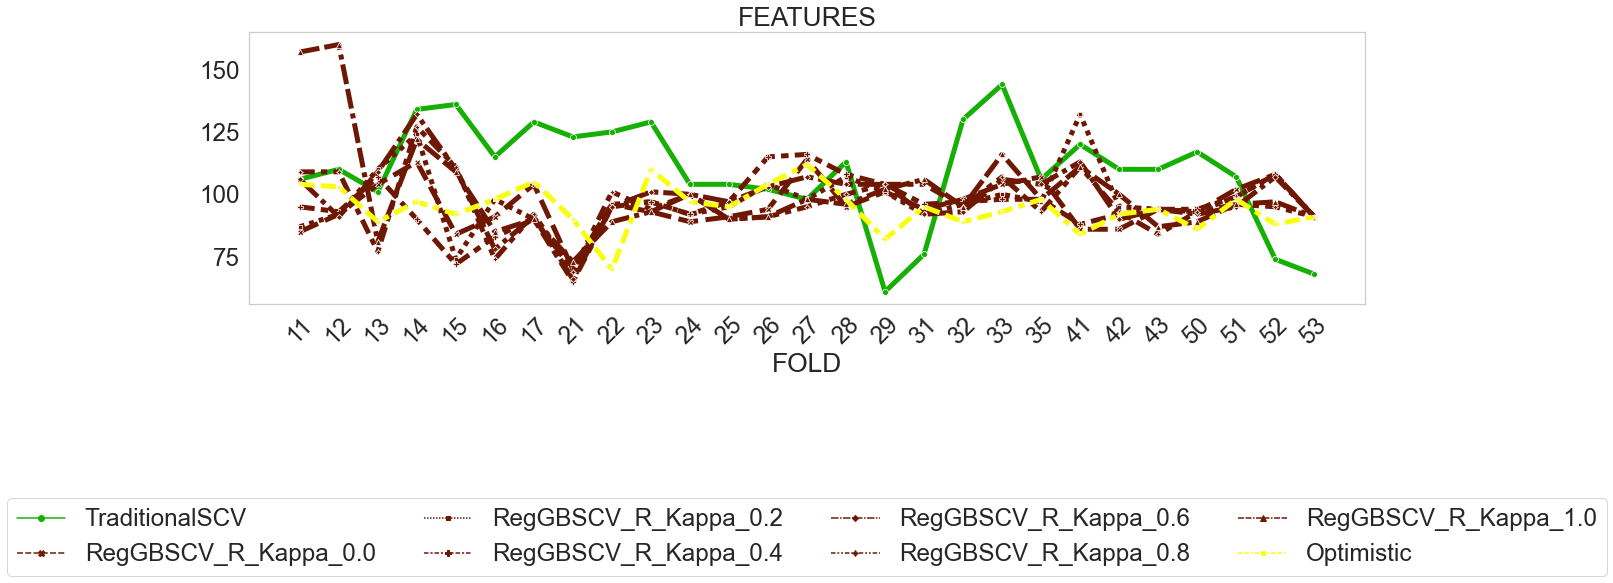

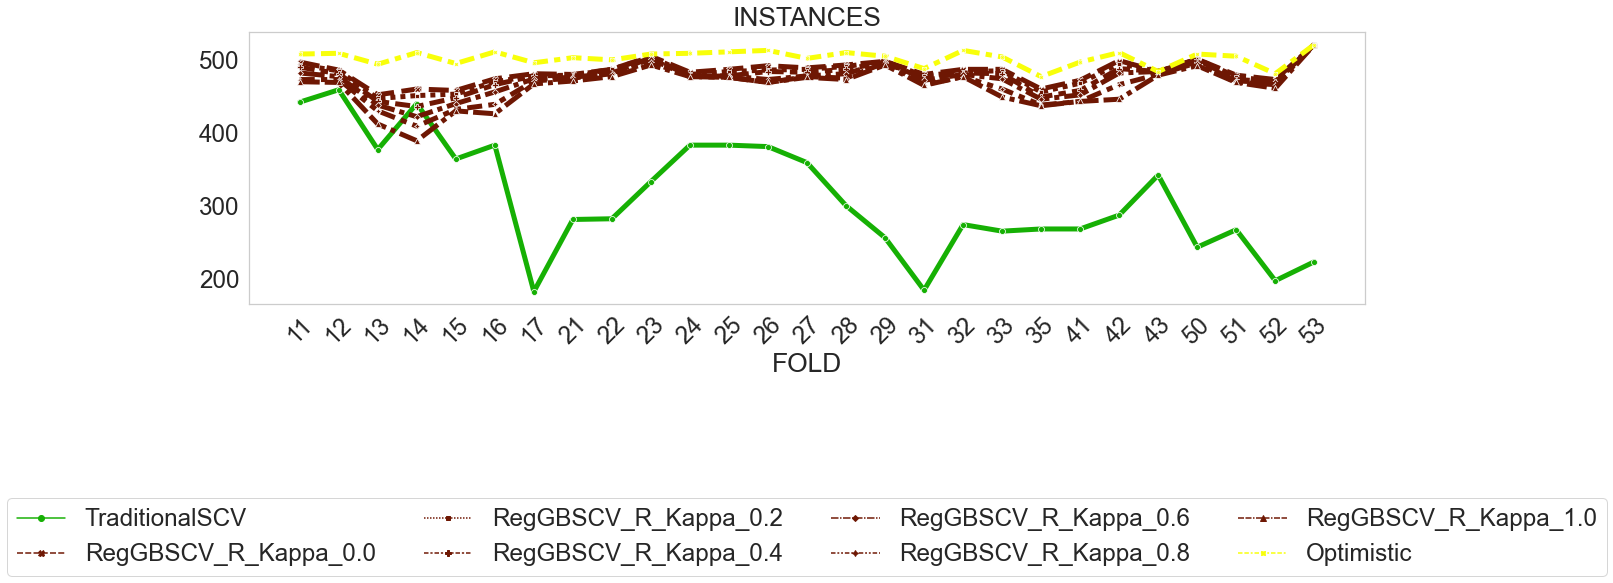

In [5]:
viz_metrics = VizMetrics(
    root_path=os.path.join(env_var["root_path"], dataset),
    cv_methods=["TraditionalSCV", 
                "RegGBSCV_R_Kappa_0.0",
                "RegGBSCV_R_Kappa_0.2",
                "RegGBSCV_R_Kappa_0.4",
                "RegGBSCV_R_Kappa_0.6",
                "RegGBSCV_R_Kappa_0.8",
                "RegGBSCV_R_Kappa_1.0", 
                "Optimistic"],
    index_col="FOLD",
    fs_method="CFS",
    ml_method="LGBM",
)
print("Generating performance plots...")
viz_metrics.run()

### 7.2 Generate dependence plot

Generating dependence plot...


100%|██████████| 3/3 [00:29<00:00,  9.69s/it]


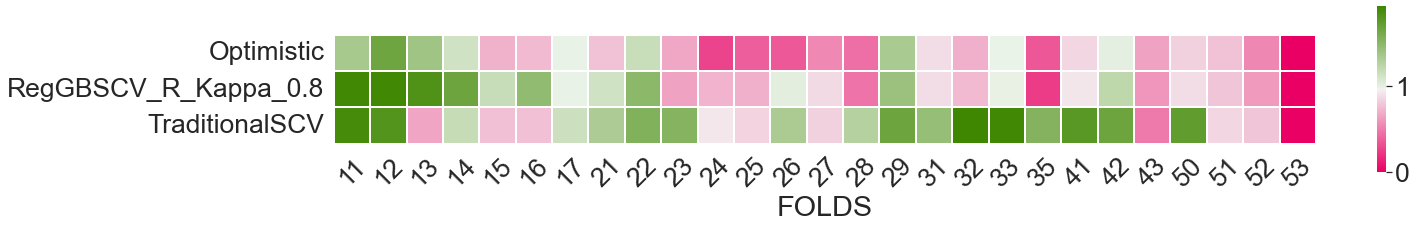

In [6]:
data = pd.read_csv(os.path.join(env_var["root_path"], dataset, "data.csv"))
viz_dependence = VizDependence(
    root_path=os.path.join(env_var["root_path"], dataset),
    cv_methods=["Optimistic", "RegGBSCV_R_Kappa_0.8", "TraditionalSCV"],
    index_col="INDEX",
    fold_col="INDEX_FOLDS",
    target_col="TARGET",
    adj_matrix=adj_matrix,
    prob=0.95,
    fold_list=data["INDEX_FOLDS"].unique(),
    paper=False,
)
print("Generating dependence plot...")
viz_dependence.run()